# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Import Dataset

In [3]:
df = pd.read_csv('datasets/cleaned_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,B365 Prediction,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.5,8.5,D,0,0,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67
1,2012-09-01,swansea,sunderland,2.0,2.0,14.0,4.0,10.0,3.0,11.0,7.0,8.0,0.0,1.0,1.0,1.0,0.0,2.20,3.3,3.4,D,0,0,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33
2,2012-09-22,west-ham,sunderland,1.0,1.0,20.0,4.0,11.0,2.0,12.0,10.0,10.0,1.0,2.0,1.0,0.0,0.0,2.10,3.3,3.6,D,0,0,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33
3,2012-10-06,city,sunderland,3.0,0.0,26.0,8.0,16.0,6.0,10.0,10.0,15.0,4.0,0.0,3.0,0.0,0.0,1.29,5.5,11.0,W,1,0,W,16.0,10.0,6.0,10.8,1.0,0.0,3.0,NaN,1.8,NaN,1.0,5.6,3.4,2.2,12.6,1.0,0.0,1.0,NaN,1.4,NaN,1.0,81,83,85,83.00,74,75,77,75.33
4,2012-10-27,stoke,sunderland,0.0,0.0,11.0,6.0,6.0,3.0,12.0,6.0,7.0,3.0,2.0,2.0,0.0,0.0,1.95,3.3,4.2,D,0,0,W,8.0,4.6,4.6,12.6,1.8,0.0,-1.0,NaN,1.0,NaN,0.0,9.0,4.8,4.6,14.4,1.4,0.0,-2.0,NaN,1.2,NaN,0.0,75,76,75,75.33,74,75,77,75.33


In [4]:
df = df[['HDays', 'ADays',
         'HASL5M', 'HASTL5M', 'HACL5M', 'HAFL5M', 'HAYCL5M', 'HARCL5M',
         'HGDL5M', 'HGDL5HM', 'HAPL5M', 'HAPL5HM',
         'AASL5M', 'AASTL5M', 'AACL5M', 'AAFL5M', 'AAYCL5M', 'AARCL5M',
         'AGDL5M', 'AGDL5AM', 'AAPL5M','AAPL5AM', 
         'HDef', 'HMid', 'HAtt', 'HOVR',
         'ADef', 'AMid', 'AAtt', 'AOVR',
         'B365H', 'B365D', 'B365A',
         'Result'
        ]]
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR,B365H,B365D,B365A,Result
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67,1.40,4.5,8.5,D
1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,73,73,73.00,74,75,77,75.33,2.20,3.3,3.4,D
2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,73,75,73.00,74,75,77,75.33,2.10,3.3,3.6,D
3,1,0,16.0,10.0,6.0,10.8,1.0,0.0,3.0,NaN,1.8,NaN,5.6,3.4,2.2,12.6,1.0,0.0,1.0,NaN,1.4,NaN,81,83,85,83.00,74,75,77,75.33,1.29,5.5,11.0,W
4,0,0,8.0,4.6,4.6,12.6,1.8,0.0,-1.0,NaN,1.0,NaN,9.0,4.8,4.6,14.4,1.4,0.0,-2.0,NaN,1.2,NaN,75,76,75,75.33,74,75,77,75.33,1.95,3.3,4.2,D


In [5]:
df.shape

(3800, 34)

In [6]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR,B365H,B365D,B365A,Result
0,0,0,12.8,6.2,6.6,11.0,1.4,0.0,1.0,8.0,1.4,2.0,9.4,4.0,4.6,10.8,2.0,0.0,-5.0,-4.0,0.4,0.6,75,77,78,76.67,74,75,77,75.33,1.67,3.75,5.25,L
1,1,0,9.8,5.0,4.2,12.4,1.2,0.0,2.0,0.0,1.8,2.0,12.2,6.8,4.8,11.8,2.2,0.0,-2.0,-2.0,0.8,1.0,73,72,72,72.33,74,75,77,75.33,2.10,3.30,3.60,W
2,0,1,13.6,8.0,5.8,8.2,1.4,0.0,4.0,5.0,2.4,2.4,15.6,9.4,7.0,11.4,1.6,0.0,-2.0,-3.0,0.8,0.8,83,82,86,83.67,74,75,77,75.33,1.20,6.50,15.00,W
3,0,0,14.4,8.0,6.2,10.2,0.6,0.0,4.0,2.0,2.0,1.6,14.4,9.0,7.4,11.0,1.2,0.0,-2.0,-2.0,0.8,0.8,72,70,73,71.67,74,75,77,75.33,2.00,3.50,3.75,L
4,1,1,18.4,10.8,7.4,8.0,1.2,0.0,4.0,6.0,1.8,2.0,12.0,7.8,5.2,11.2,1.4,0.0,2.0,-1.0,1.8,1.2,79,80,79,79.33,74,75,77,75.33,1.40,4.50,8.50,W


In [7]:
df.shape

(3553, 34)

## Data Imbalance

# 2. Feature Selection

In [8]:
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [9]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [10]:
# y = df.Result
# X = df.drop("Result", 1)
# colnames = X.columns

# # using the BorutaPy function
# rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
# feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

# feat_selector.fit(X.values, y.values.ravel())

# boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
# boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
# boruta_score = boruta_score.sort_values("Score", ascending = False)

# # boruta_score.head(15)

# features = boruta_score[boruta_score['Score'] > 0.8].Features.tolist()

# X = df[features]
# y = df['Result']
# X.head()

# 2. Model Building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LDA
# lda = LDA(n_components = 2)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

In [13]:
X_train[0]

array([ 1.29075221,  1.28592176,  1.52816548,  0.80980344,  1.87683734,
       -1.62908928, -2.14042237, -0.56442838,  0.82158911,  0.68786596,
        0.9301447 ,  1.19923669, -0.45534843, -0.61258151,  0.28986848,
        0.06006686, -1.07240927, -0.55721934, -0.2361967 , -0.70611129,
       -0.58777098, -1.14400186,  1.47049178,  1.68263043,  1.50775866,
        1.63301616,  0.64051061,  0.14997118, -0.0867707 ,  0.2219638 ,
       -0.70609441,  0.5534913 ,  0.92690894])

In [14]:
y_train[0]

'W'

### Data Imbalance

In [15]:
from imblearn.over_sampling import SMOTENC

In [16]:
y_train.shape

(2842,)

In [17]:
# SMOTENC
smt = SMOTENC(categorical_features=[0,1], sampling_strategy="minority", random_state=0, k_neighbors=5)

# Fit the smote model with training data only
X_train, y_train = smt.fit_resample(X_train, y_train)

C:\Users\choibs\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
y_train.shape

(3447,)

## 2.1 Random Forest Classifier

Highest Accuracy: 53.59 %

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
rf_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = rf_classifier.predict(X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


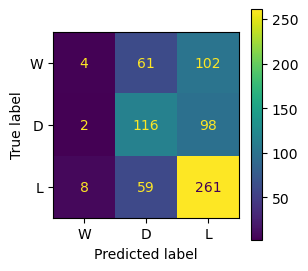

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show()

In [22]:
from sklearn.model_selection import cross_validate

result = cross_validate(estimator = rf_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
print(f"Accuracy on Train Set: {result['test_accuracy']}")
print(f"f1-score on Train Set: {result['test_f1_macro']}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = rf_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

## 2.2 SVM Classifier

Highest Accuracy: 54.99 %

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
from sklearn.model_selection import cross_validate

result = cross_validate(estimator = svc_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
print(f"Accuracy on Train Set: {result['test_accuracy']}")
print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = svc_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

## 2.3 Naive Bayes Classifier

Highest Accuracy: 55.63

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Naive Bayes Classifier
# use GridSearchCV for hyperparameter tuning
classifier = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
nb_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
from sklearn.model_selection import cross_validate

result = cross_validate(estimator = nb_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
print(f"Accuracy on Train Set: {result['test_accuracy']}")
print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = nb_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

## 2.4 KNN Classifier

Highest Accuracy: 47.71 %

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN Classifier
# use GridSearchCV for hyperparameter tuning
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
knn_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
from sklearn.model_selection import cross_validate

result = cross_validate(estimator = knn_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
print(f"Accuracy on Train Set: {result['test_accuracy']}")
print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = knn_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))